In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
import math
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error,mean_squared_error, classification_report, confusion_matrix
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv", encoding="latin-1")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
data.shape

(205, 26)

In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
description = data.describe().T.style.background_gradient(
cmap='viridis',
low=0, high=1,
axis=None
)
styled_description = description.set_properties(**{'font-size': '10pt','text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')
styled_description

,count,mean,std,min,25%,50%,75%,max
car_ID,205.000000,103.000000,59.322565,1.000000,52.000000,103.000000,154.000000,205.000000
symboling,205.000000,0.834146,1.245307,-2.000000,0.000000,1.000000,2.000000,3.000000
wheelbase,205.000000,98.756585,6.021776,86.600000,94.500000,97.000000,102.400000,120.900000
carlength,205.000000,174.049268,12.337289,141.100000,166.300000,173.200000,183.100000,208.100000
carwidth,205.000000,65.907805,2.145204,60.300000,64.100000,65.500000,66.900000,72.300000
carheight,205.000000,53.724878,2.443522,47.800000,52.000000,54.100000,55.500000,59.800000
curbweight,205.000000,2555.565854,520.680204,1488.000000,2145.000000,2414.000000,2935.000000,4066.000000
enginesize,205.000000,126.907317,41.642693,61.000000,97.000000,120.000000,141.000000,326.000000
boreratio,205.000000,3.329756,0.270844,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,205.000000,3.255415,0.313597,2.070000,3.110000,3.290000,3.410000,4.170000


In [13]:
correlation = data.corr()
print("Correlation: \n", correlation)

Correlation: 
                     car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.27360

In [14]:
covariance = data.cov()
print("Covariance: \n", covariance)

Covariance: 
                         car_ID   symboling     wheelbase     carlength  \
car_ID             3519.166667  -11.200980     46.342647    124.885294   
symboling           -11.200980    1.550789     -3.989099     -5.494240   
wheelbase            46.342647   -3.989099     36.261782     64.975189   
carlength           124.885294   -5.494240     64.975189    152.208688   
carwidth              6.666667   -0.622229     10.271615     22.261035   
carheight            37.102941   -1.646344      8.673144     14.802788   
curbweight         2222.754902 -147.636083   2434.296746   5638.336200   
enginesize          -83.818627   -5.486035    142.766545    351.081549   
boreratio             4.178480   -0.043864      0.797132      2.026453   
stroke               -2.991863   -0.003411      0.303957      0.501153   
compressionratio     35.409755   -0.883009      5.974562      7.762938   
horsepower          -35.200980    3.490100     84.128637    269.606949   
peakrpm           -5766.

In [15]:
data.max()

car_ID                    205
symboling                   3
CarName             vw rabbit
fueltype                  gas
aspiration              turbo
doornumber                two
carbody                 wagon
drivewheel                rwd
enginelocation           rear
wheelbase               120.9
carlength               208.1
carwidth                 72.3
carheight                59.8
curbweight               4066
enginetype              rotor
cylindernumber            two
enginesize                326
fuelsystem               spfi
boreratio                3.94
stroke                   4.17
compressionratio         23.0
horsepower                288
peakrpm                  6600
citympg                    49
highwaympg                 54
price                 45400.0
dtype: object

In [16]:
data.mean()

car_ID                103.000000
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

In [17]:
data.median()

car_ID                103.00
symboling               1.00
wheelbase              97.00
carlength             173.20
carwidth               65.50
carheight              54.10
curbweight           2414.00
enginesize            120.00
boreratio               3.31
stroke                  3.29
compressionratio        9.00
horsepower             95.00
peakrpm              5200.00
citympg                24.00
highwaympg             30.00
price               10295.00
dtype: float64

In [18]:
data.mode()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0.0,peugeot 504,gas,std,four,sedan,fwd,front,94.5,...,92.0,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,5572.0
1,2,NaN,toyota corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6229.0
2,3,NaN,toyota corona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6692.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7295.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


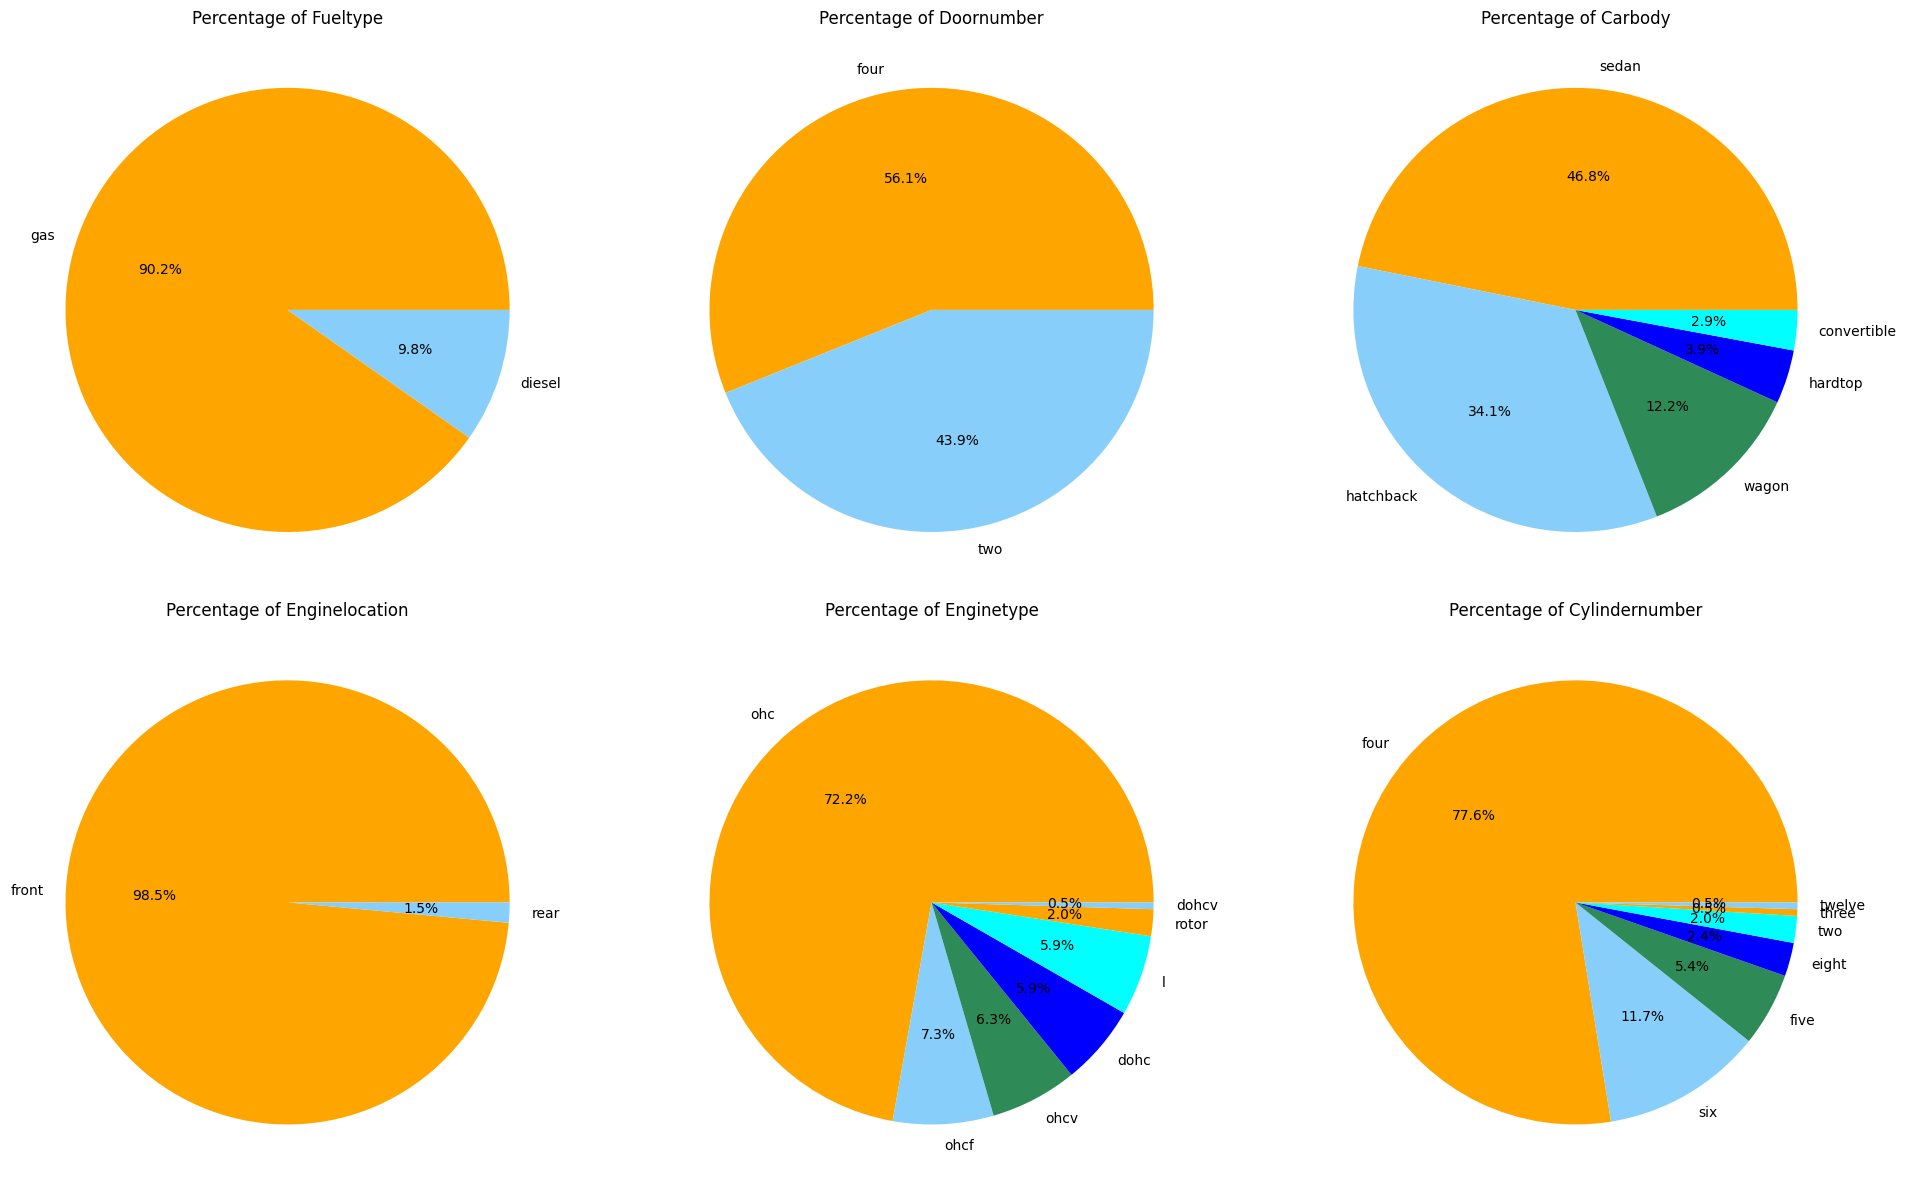

In [19]:
columns = ['fueltype', 'doornumber', 'carbody', 'enginelocation', 'enginetype','cylindernumber']
colors = ['orange', 'lightskyblue', 'seagreen', 'blue', 'cyan']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()
for i, column in enumerate(columns):
  counts = data[column].value_counts(normalize=True)
  ax = axes[i]
  ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
  ax.set_title(f"Percentage of {column.capitalize()}")
plt.tight_layout()
plt.show()

In [20]:
numeric_cols = ['wheelbase', 'curbweight', 'enginesize', 'horsepower','citympg', 'highwaympg', 'price']
categorical_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'fuelsystem']
num_cols = len(numeric_cols)
num_subplots = num_cols * (num_cols - 1)

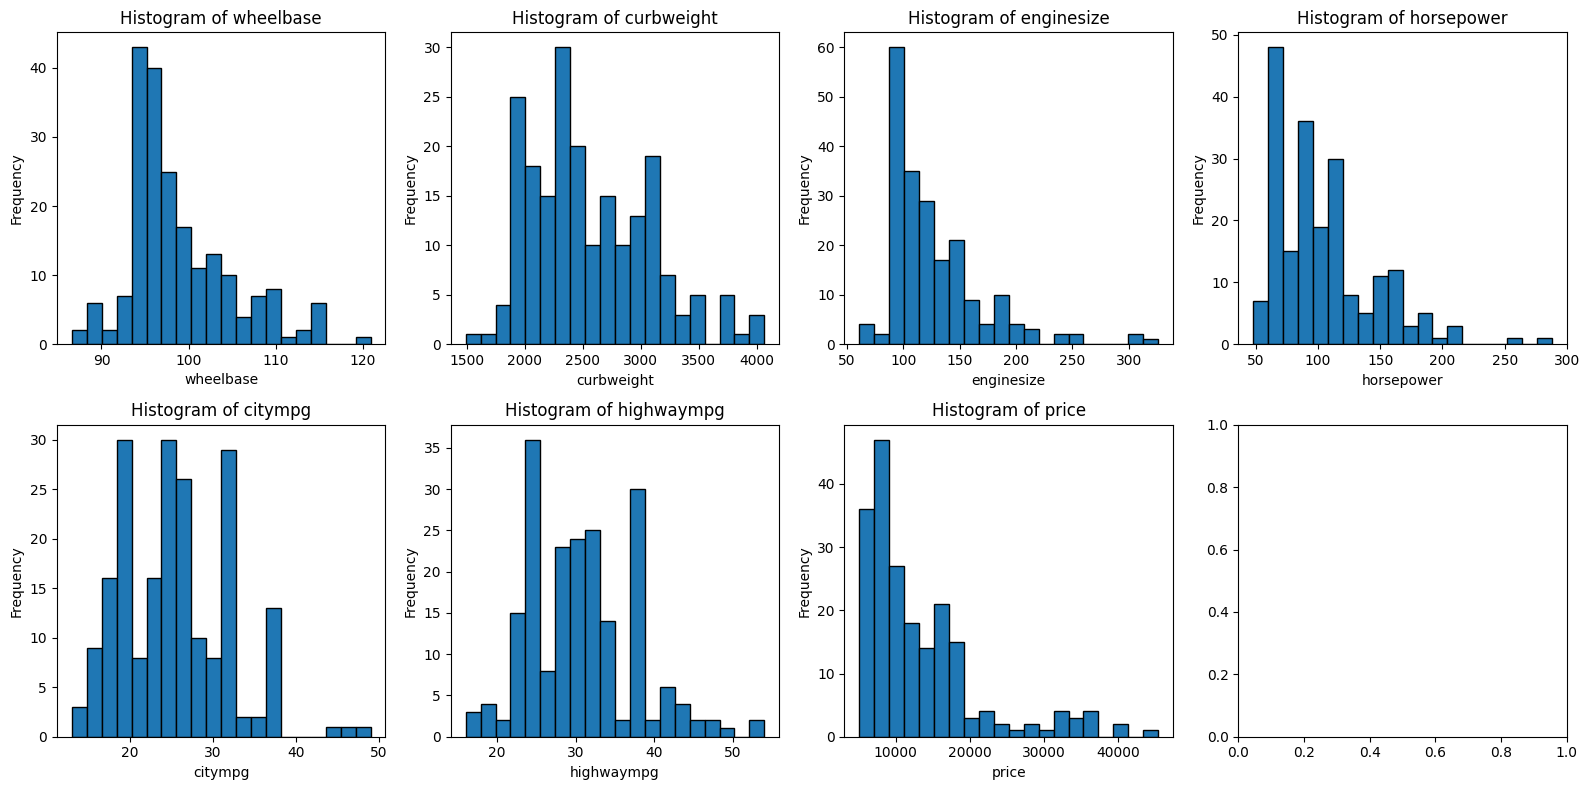

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
  ax = axes[i]
  ax.hist(data[col], bins=20, edgecolor='k')
  ax.set_title(f'Histogram of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

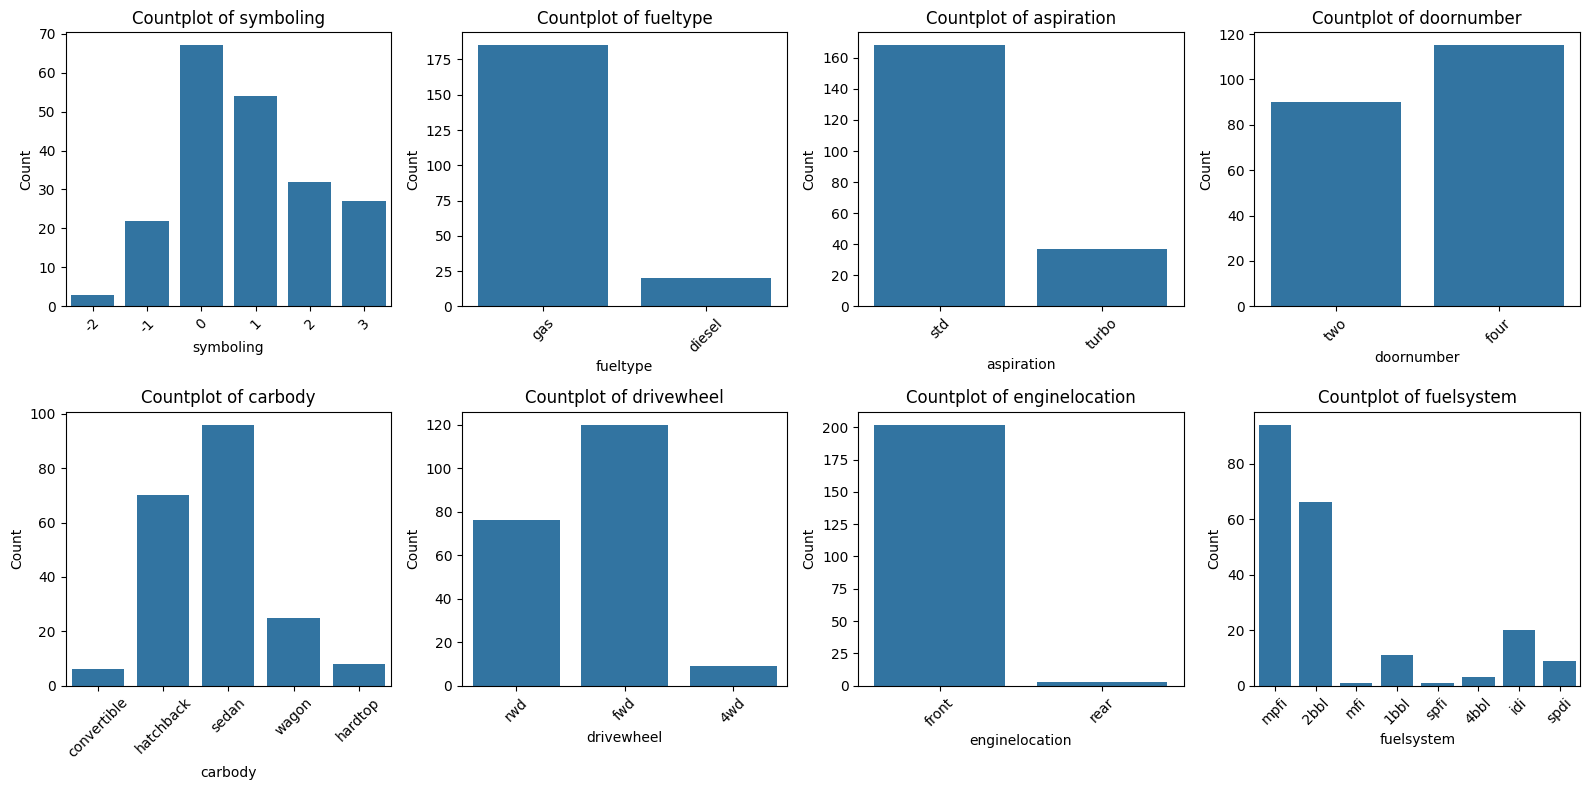

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
  ax = axes[i]
  sns.countplot(data=data, x=col, ax=ax)
  ax.set_title(f'Countplot of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

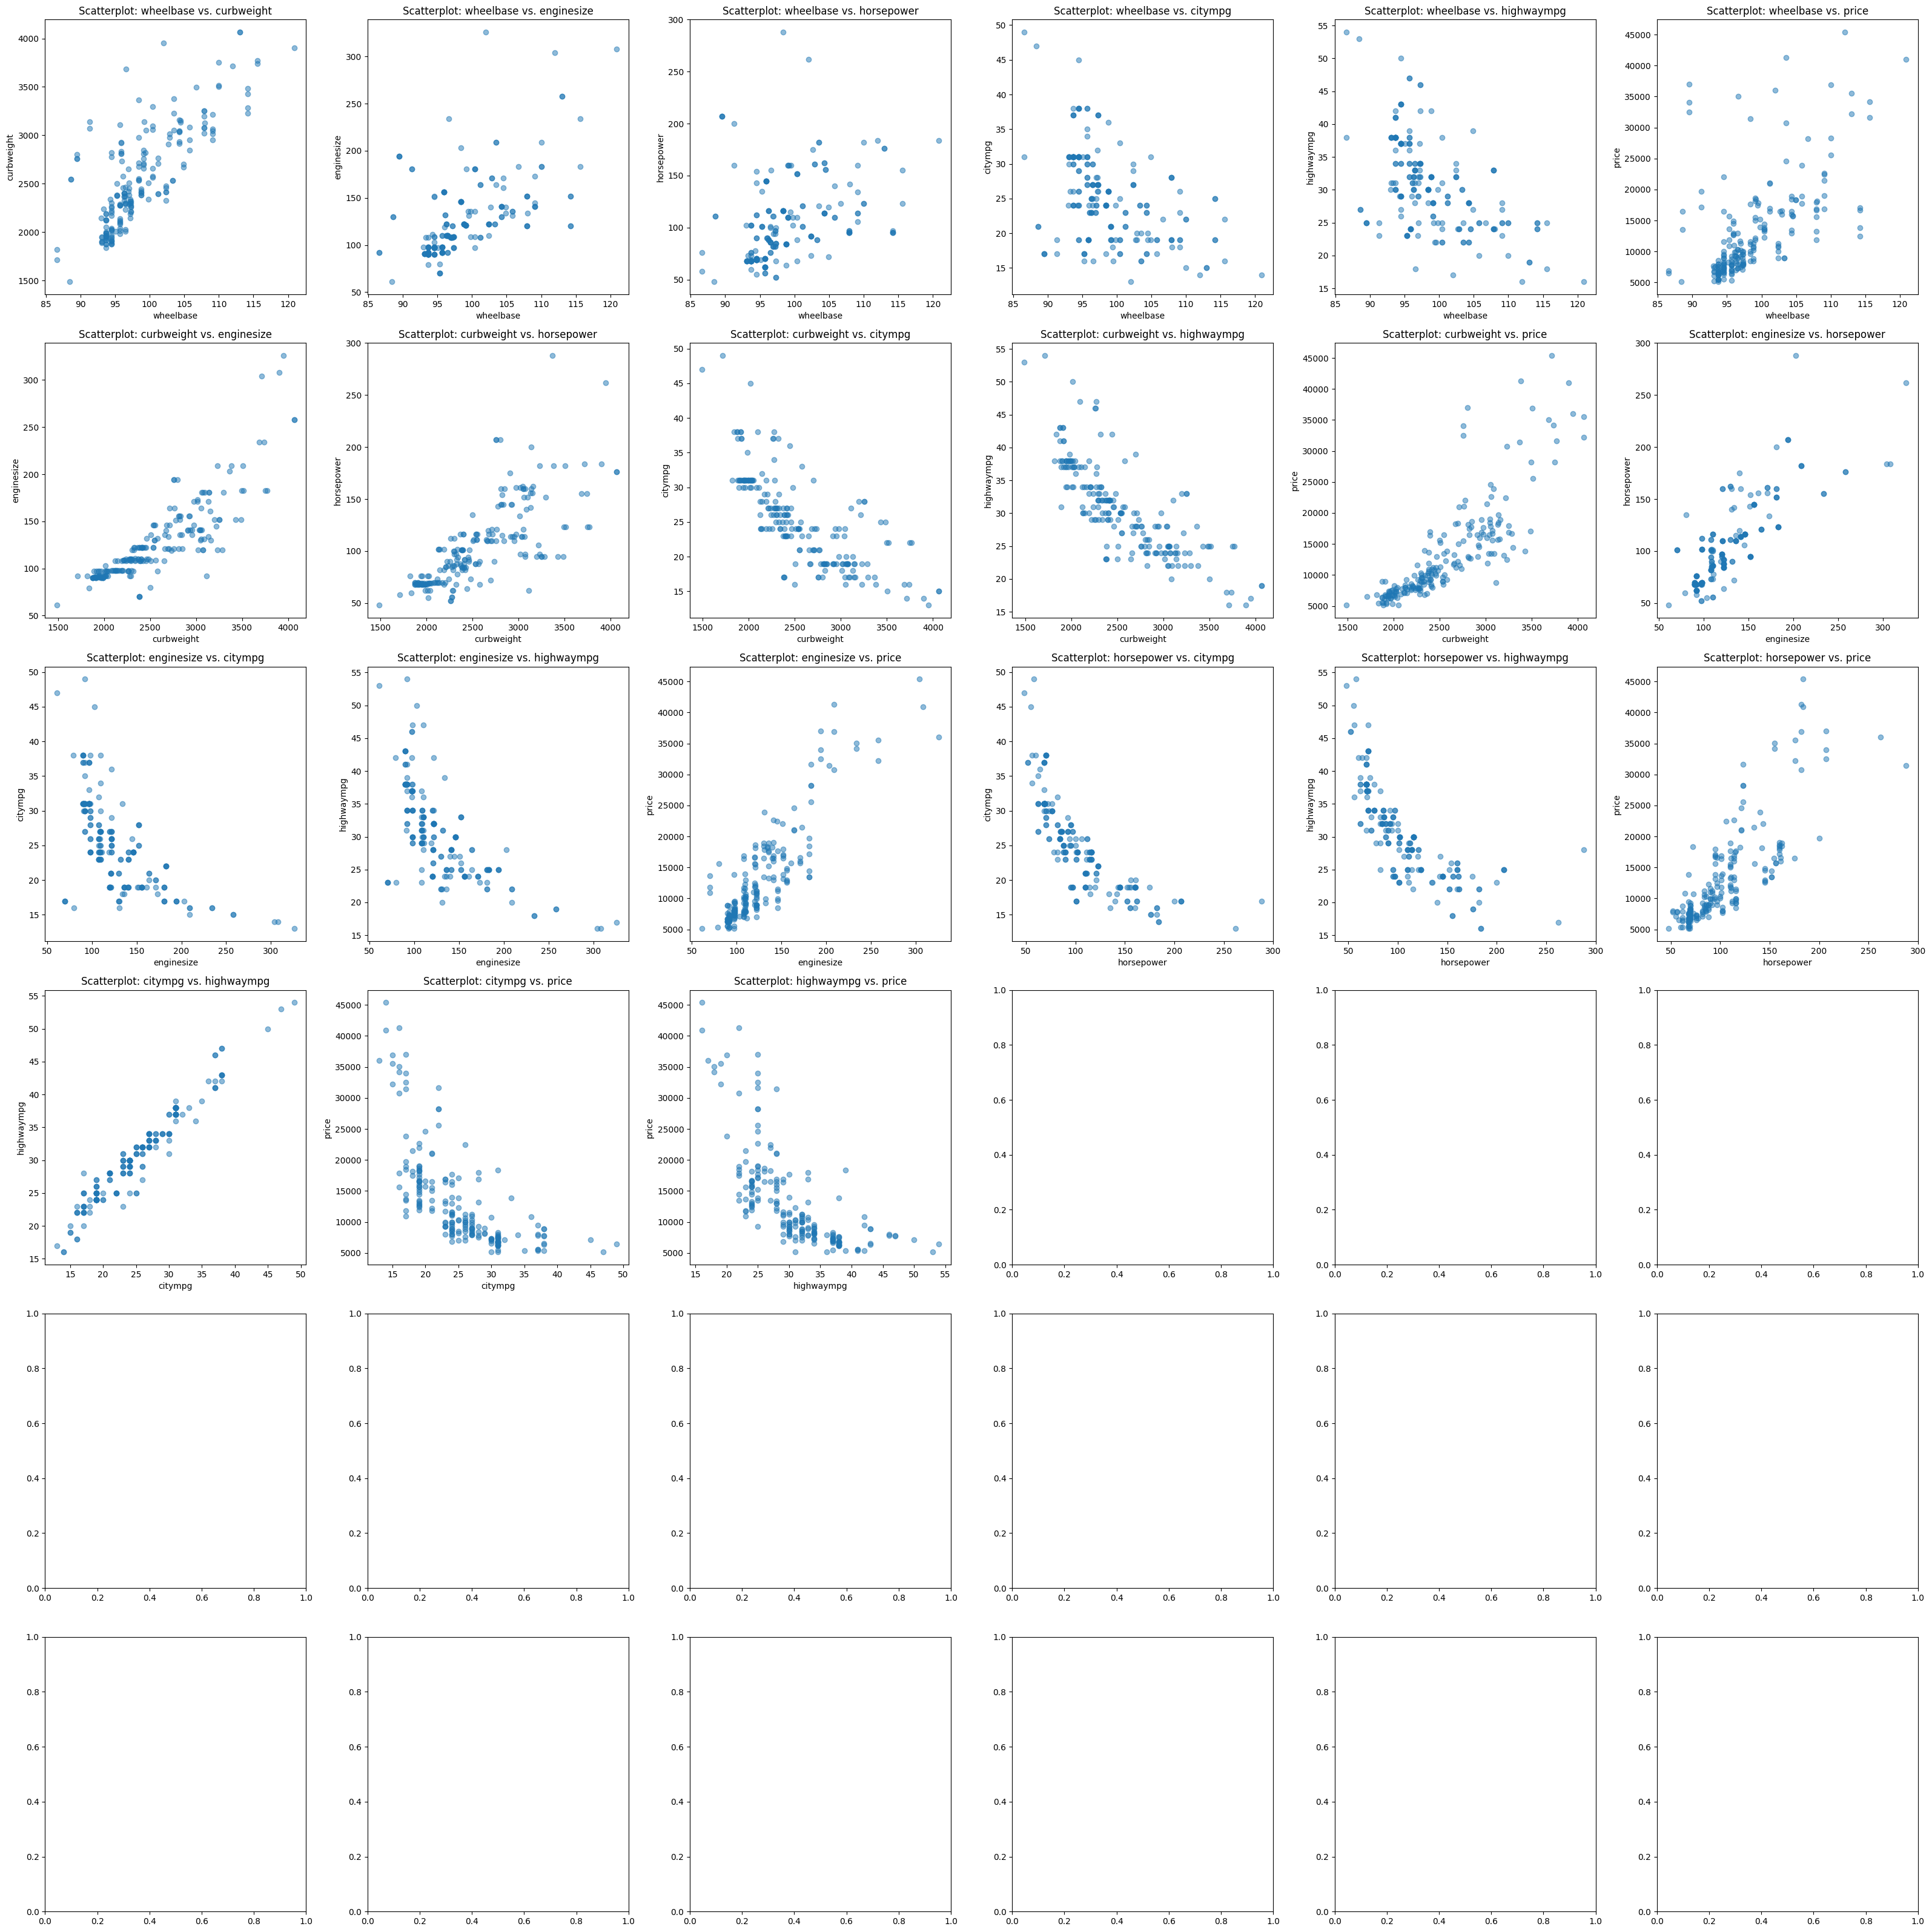

In [23]:
fig, axes = plt.subplots(num_cols - 1, num_cols - 1, figsize=(32, 32))
axes = axes.flatten()
for i, (col1, col2) in enumerate(itertools.combinations(numeric_cols, 2)):
  ax = axes[i]
  ax.scatter(data[col1], data[col2], alpha=0.5)
  ax.set_title(f'Scatterplot: {col1} vs. {col2}')
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
for i in range(num_subplots, len(axes)):
  fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

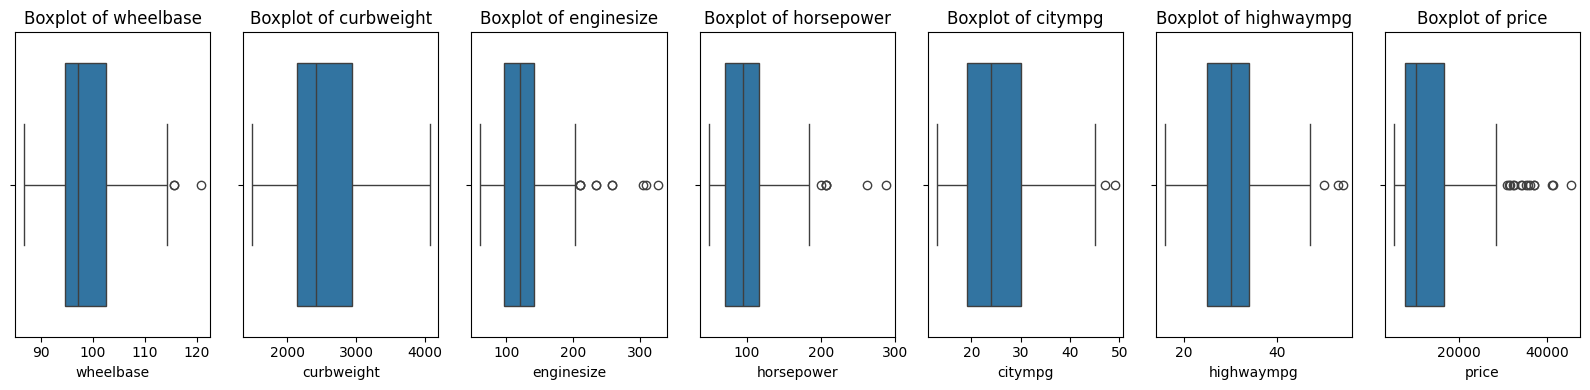

In [24]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(16, 4))
for i, col in enumerate(numeric_cols):
  ax = axes[i]
  sns.boxplot(data=data, x=col, ax=ax)
  ax.set_title(f'Boxplot of {col}')
  ax.set_xlabel(col)
plt.tight_layout()
plt.show()

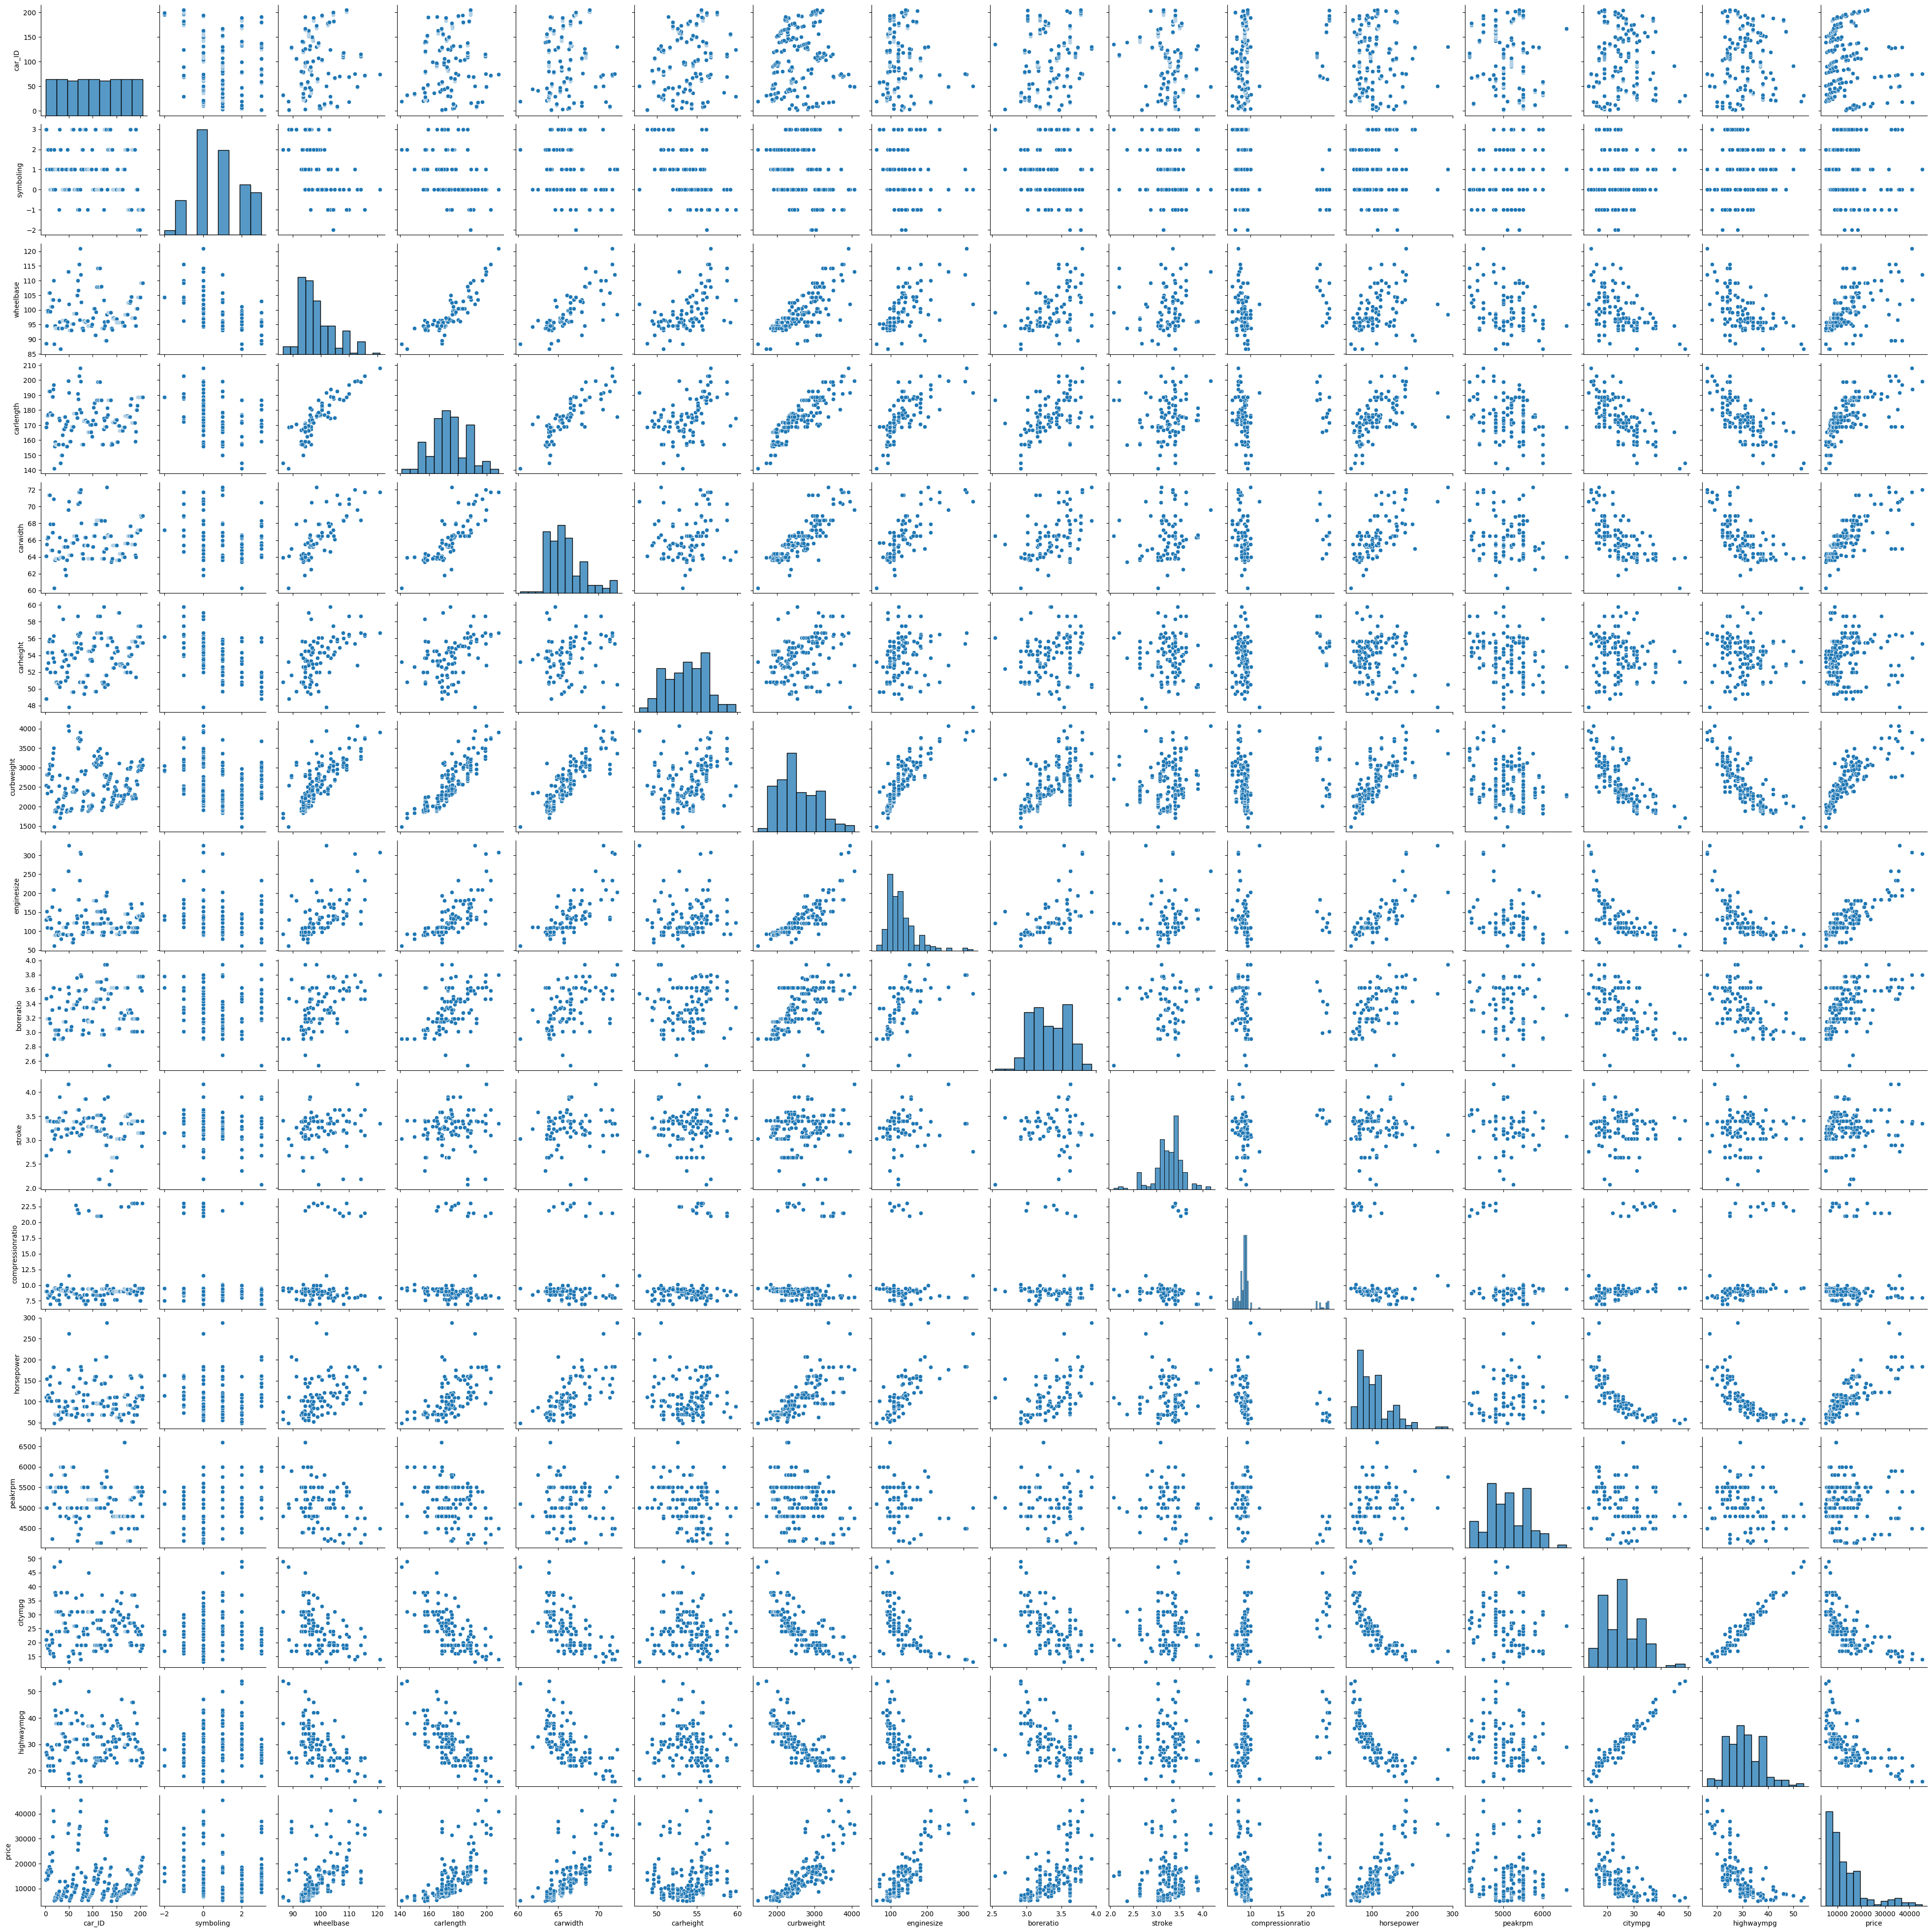

In [25]:
sns.pairplot(data)

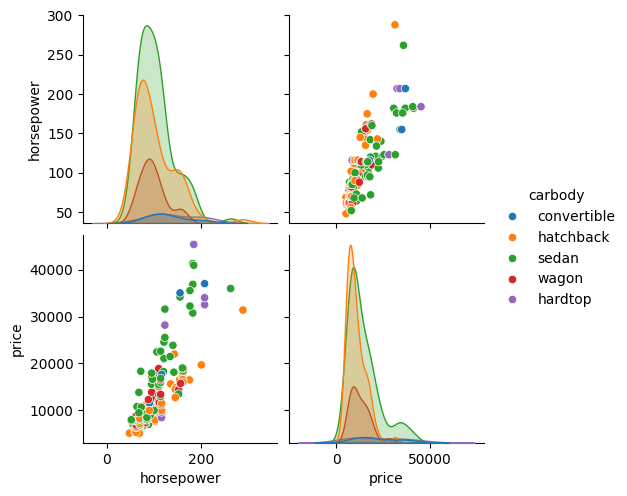

In [26]:
sns.pairplot(data[['horsepower','price','carbody']], hue="carbody")

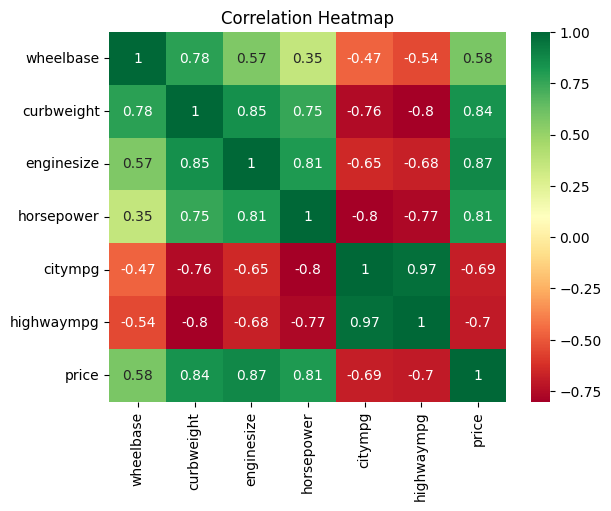

In [27]:
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

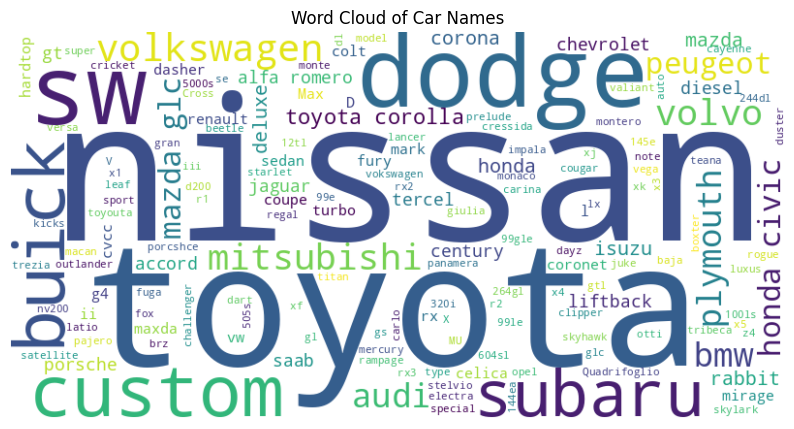

In [28]:
unique_car_names = data['CarName'].unique()
unique_car_names_text = ' '.join(unique_car_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_car_names_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Car Names')
plt.show()

In [29]:
le = LabelEncoder()
le.fit(data['price'])
data['encode_target'] = le.transform(data['price'])

In [30]:
numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg']
X = data[numeric_cols]
y = data['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

153 153
52 52


In [32]:
vect = CountVectorizer()
vect.fit(X_train)
CountVectorizer()
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)
y_train_pred =model.predict(X_train)
y_pred =model.predict(X_test)
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test,y_pred)), 2))
print("R - Squared Score: ", round(100*r2_score(y_test, y_pred), 2))

Mean Absolute Error:  2557.45
Mean Squared Error:  12937870.61
Root Mean Squared Error:  3596.93
R - Squared Score:  80.88


In [34]:
dec_tree_model = DecisionTreeRegressor(random_state=0)
dec_tree_model.fit(X_train,y_train)
y_train_pred = dec_tree_model.predict(X_train)
y_pred = dec_tree_model.predict(X_test)
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred), 2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test,y_pred)), 2))
print("R - Squared Score: ", round(100*r2_score(y_test, y_pred), 2))

Mean Absolute Error:  1856.04
Mean Squared Error:  8008424.48
Root Mean Squared Error:  2829.92
R - Squared Score:  88.16


In [35]:
Rf = RandomForestRegressor(n_estimators = 15, criterion = 'squared_error',random_state = 20, n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_testpred = Rf.predict(X_test)

In [36]:
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, Rf_testpred),2))
print("Mean Squared Error: ", round(mean_squared_error(y_test, Rf_testpred), 2))
print("Root Mean Squared Error: ", round(math.sqrt(mean_squared_error(y_test,Rf_testpred)), 2))
print("R - Squared Score: ", round(100*r2_score(y_test, Rf_testpred), 2))

Mean Absolute Error:  1391.68
Mean Squared Error:  4238569.77
Root Mean Squared Error:  2058.78
R - Squared Score:  93.74


Text(0, 0.5, 'Rf_testpred')

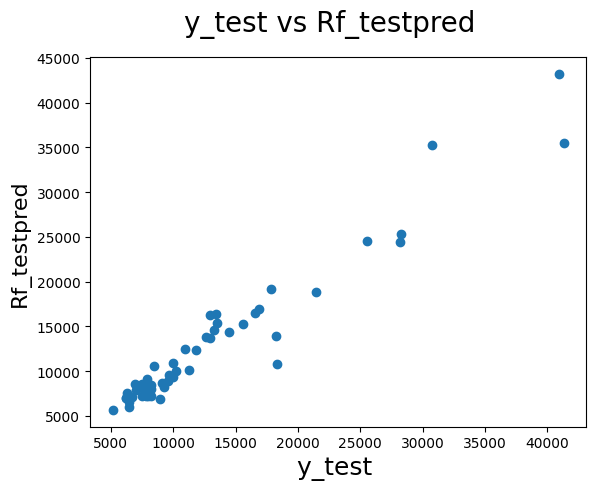

In [37]:
fig = plt.figure()
plt.scatter(y_test,Rf_testpred)
fig.suptitle('y_test vs Rf_testpred', fontsize=20)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('Rf_testpred', fontsize=16)